In [1]:
import sccellfie
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glasbey

import textwrap

## To avoid warnings
import warnings
warnings.filterwarnings("ignore")

#https://sccellfie.readthedocs.io/en/latest/notebooks/quick_start_human.html

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [99]:
# Specify the path to your .h5ad file
# file_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad"
file_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/lung_calico.h5ad"
# file_path = '/mnt/data/melhajjar/ipf_metadata_analysis/human_cell_atlas/lung_core_HLCA.h5ad'
# Load the .h5ad file into an AnnData object
adata = sc.read_h5ad(file_path)

In [3]:
adata = adata[adata.obs['sex'] != 'female'].copy()

In [4]:
adata = adata[adata.obs['age'] != '1m'].copy()

In [5]:
adata.obs['age'].unique()

['18m', '30m', '3m']
Categories (3, object): ['3m', '18m', '30m']

In [6]:
# Step 1: Define desired order
age_order = ['3m', '18m', '30m']

# Step 2: Convert 'age' column to categorical with that order
adata.obs['age'] = pd.Categorical(adata.obs['age'], categories=age_order, ordered=True)

# (Optional) Check that it worked
print(adata.obs['age'].cat.categories)


Index(['3m', '18m', '30m'], dtype='object')


In [100]:
adata.obs

,age,animal,batch,n_counts,n_genes,percent_Rn45s,percent_mito,replicate,sample_idx,louvain,pred_type,cell_type,subtype
index,,,,,,,,,,,,,
AAACCTGAGCGTTCCG-1-0,old,1,0,2846.0,1189,0.000347,0.022909,1,0,13,leukocyte,leukocyte,leukocyte
AAACCTGAGTGAAGTT-1-0,old,1,0,1650.0,949,0.000000,0.026363,1,0,0,lung endothelial cell,lung endothelial cell,lung endothelial cell
AAACCTGCACAAGACG-1-0,old,1,0,4532.0,1603,0.004961,0.069456,1,0,6,alveolar macrophage,alveolar macrophage,alveolar macrophage
AAACCTGCACCGCTAG-1-0,old,1,0,998.0,623,0.000000,0.022549,1,0,0,lung endothelial cell,lung endothelial cell,lung endothelial cell
AAACCTGCAGCGTAAG-1-0,old,1,0,1999.0,1054,0.000000,0.026680,1,0,0,lung endothelial cell,lung endothelial cell,lung endothelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTAAATGTG-1-12,young,5,12,2245.0,1023,0.000881,0.023799,2,9,3,stromal cell,stromal cell,Npnt stromal cell
TTTGTCAAGAAACCAT-1-12,young,5,12,1188.0,724,0.000832,0.019967,2,9,0,lung endothelial cell,lung endothelial cell,lung endothelial cell
TTTGTCACACGTCTCT-1-12,young,5,12,1979.0,1048,0.000503,0.023116,2,9,12,lung endothelial cell,lung endothelial cell,lung endothelial cell


In [101]:
import scanpy as sc

# If not already preprocessed, minimally do PCA + neighbors
if 'neighbors' not in adata.uns or 'connectivities_key' not in adata.uns.get('neighbors', {}):
    # (Adjust these steps if you already normalized/HVG-selected elsewhere)
    if 'X_pca' not in adata.obsm:
        sc.pp.pca(adata, n_comps=50)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50, key_added='neighbors')

# sanity-check (should print 'connectivities' / 'distances' and True)
print(adata.uns['neighbors'].get('connectivities_key'),
      adata.uns['neighbors'].get('distances_key'),
      'connectivities' in adata.obsp and 'distances' in adata.obsp)


neighbors_connectivities neighbors_distances False


In [102]:
results = sccellfie.run_sccellfie_pipeline(adata,
                                           organism='mouse',
                                           sccellfie_data_folder=None,
                                           n_counts_col='n_counts', # Total counts per cell will be computed if left as None,
                                           process_by_group=False, # Whether to do the processing by cell groups
                                           groupby=None, # Column indicating cell groups if `process_by_group=True`
                                           neighbors_key='neighbors', # Neighbors information if precomputed. Otherwise, it will be computed here
                                           n_neighbors=10, # Number of neighbors to use
                                           batch_key=None, # there is no batch_key in this dataset
                                           threshold_key='sccellfie_threshold',  # This is for using the default database. If personalized thresholds are used, specificy column name
                                           smooth_cells=True, # Whether to perform gene expression smoothing before running the tool
                                           alpha=0.33, # Importance of neighbors' expression for the smoothing (0 to 1)
                                           chunk_size=5000, # Number of chunks to run the processing steps (helps with the memory)
                                           disable_pbar=False,
                                           save_folder=None, # In case results will be saved. If so, results will not be returned and should be loaded from the folder (see sccellfie.io.load_data function
                                           save_filename=None # Name for saving the files, otherwise a default name will be used
                                          )


==== scCellFie Pipeline: Initializing ====
Loading scCellFie database for organism: mouse

==== scCellFie Pipeline: Processing entire dataset ====

---- scCellFie Step: Preprocessing data ----

---- scCellFie Step: Preparing inputs ----
Gene names corrected to match database: 9
Shape of new adata object: (20755, 577)
Number of GPRs: 557
Shape of tasks by genes: (179, 577)
Shape of reactions by genes: (557, 577)
Shape of tasks by reactions: (179, 557)

---- scCellFie Step: Smoothing gene expression ----


Smoothing Expression: 100%|███████████████████████| 1/1 [00:00<00:00,  3.06it/s]



---- scCellFie Step: Computing gene scores ----

---- scCellFie Step: Computing reaction activity ----


Cell Rxn Activities: 100%|███████████████| 20755/20755 [01:55<00:00, 179.37it/s]



---- scCellFie Step: Computing metabolic task activity ----
Removed 2 metabolic tasks with zeros across all cells.

==== scCellFie Pipeline: Processing completed successfully ====


In [10]:
results.keys()

dict_keys(['adata', 'gpr_rules', 'task_by_gene', 'rxn_by_gene', 'task_by_rxn', 'rxn_info', 'task_info', 'thresholds', 'organism'])

In [103]:
# look at all tasks available
print(results['task_info'].head())        # task names, systems, etc.

# look at the mapping of reactions ↔ tasks
print(results['task_by_rxn'].head())      # rows = reactions, cols = tasks, values 0/1

# look at the mapping of genes ↔ tasks
print(results['task_by_gene'].head())     # rows = genes, cols = tasks, values 0/1

# look at reaction annotations (GPR rules etc.)
print(results['rxn_info'].head())

                                                Task  \
0                   (R)-3-Hydroxybutanoate synthesis   
1           3'-Phospho-5'-adenylyl sulfate synthesis   
2                           AMP salvage from adenine   
3  ATP generation from glucose (hypoxic condition...   
4                             Acetoacetate synthesis   

                     System               Subsystem  
0  CARBOHYDRATES METABOLISM             KETOGENESIS  
1     NUCLEOTIDE METABOLISM                COFACTOR  
2     NUCLEOTIDE METABOLISM                 SALVAGE  
3         ENERGY METABOLISM          ATP GENERATION  
4         LIPIDS METABOLISM  CHOLESTEROL METABOLISM  
                                                    2OXOADOXm  3DSPHR  3HAO  \
Task                                                                          
(R)-3-Hydroxybutanoate synthesis                          0.0     0.0   0.0   
3'-Phospho-5'-adenylyl sulfate synthesis                  0.0     0.0   0.0   
AMP salvage from adenin

In [107]:
# Column indicating the cell types in the adata.obs dataframe
cell_group = 'cell_type'


In [108]:
# We use glasbey to expand the palette into a larger number of colors
# This is useful when we have many cell types
palette = glasbey.extend_palette('Set2',
                                 palette_size=max([10, results['adata'].metabolic_tasks.obs[cell_group].unique().shape[0]]))

In [109]:
metabolic_tasks = ['(R)-3-Hydroxybutanoate synthesis',
                   'AMP salvage from adenine',
                   # 'ENERGY METABOLISM',
                   'Acetoacetate synthesis'
                  ]

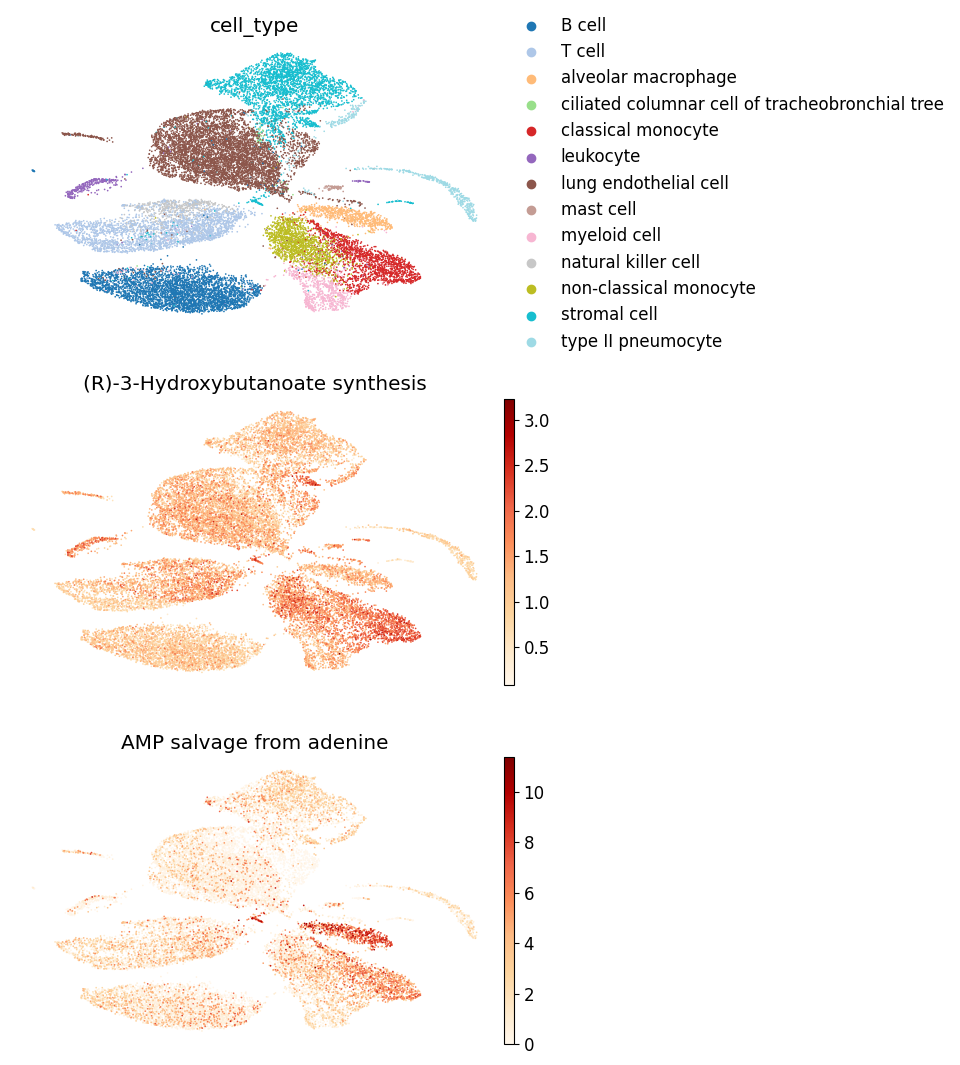

In [113]:
#For the Calico Dataset

# import scanpy as sc
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import textwrap

# # ----------------------------------
# # 1. Use your AnnData object
# # ----------------------------------
# adata = results['adata']                  # base AnnData (cells × genes)
# mt    = results['adata'].metabolic_tasks  # AnnData (cells × tasks)

# cell_group = 'cell_type'        # categorical column in adata.obs
# metabolic_tasks = [
#     "(R)-3-Hydroxybutanoate synthesis",
#     "AMP salvage from adenine",
# ]  # the tasks you want to visualize

# # ----------------------------------
# # 2. Ensure PCA → neighbors → UMAP exist
# # ----------------------------------
# if 'X_pca' not in adata.obsm:
#     print("⚙️ computing PCA...")
#     sc.pp.pca(adata, n_comps=50)

# if 'neighbors' not in adata.uns or 'connectivities' not in adata.obsp:
#     print("⚙️ computing neighbors...")
#     sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

# if 'X_umap' not in adata.obsm:
#     print("⚙️ computing UMAP...")
#     sc.tl.umap(adata)

# # ----------------------------------
# # 3. Copy metabolic task scores into adata.obs
# # ----------------------------------
# task_df = mt.to_df().reindex(adata.obs_names)

# for t in metabolic_tasks:
#     if t in task_df.columns:
#         adata.obs[t] = task_df[t].astype(float).values
#     else:
#         print(f"⚠️ Task not found in metabolic_tasks: {t}")

# # ----------------------------------
# # 4. Plot UMAP
# # ----------------------------------
# plt.rcParams['figure.figsize'] = (4, 4)
# plt.rcParams['font.size'] = 12

# sc.pl.embedding(
#     adata,
#     basis='umap',
#     color=[cell_group] + metabolic_tasks,
#     ncols=1,
#     palette='tab20',   # applies to categorical (cell_group)
#     cmap='OrRd',       # applies to continuous (tasks)
#     frameon=False,
#     wspace=0.7,
#     title=["\n".join(textwrap.wrap(t, width=60)) for t in [cell_group] + metabolic_tasks]
# )


In [115]:
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['font.size'] = 10

sc.pl.embedding(results['adata'].metabolic_tasks,
                color=[cell_group] + metabolic_tasks,
                ncols=1,
                palette=palette,
                frameon=False,
                basis='X_umap',
                wspace=0.7,
                title=["\n".join(textwrap.wrap(t, width=60)) for t in [cell_group] + metabolic_tasks],
                cmap='OrRd'
               )



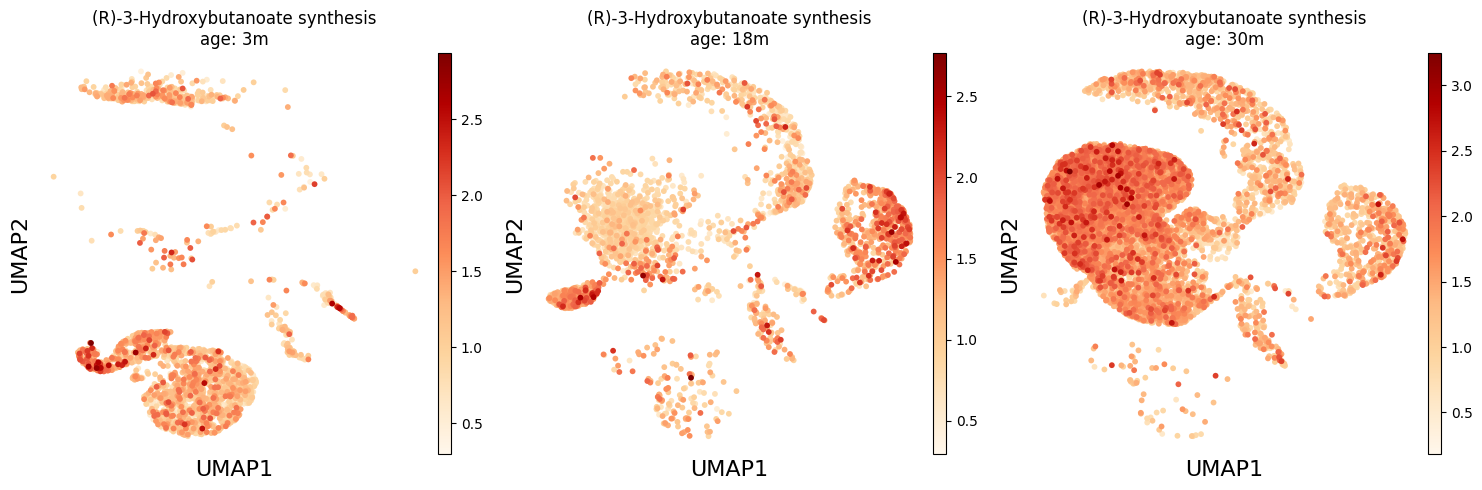

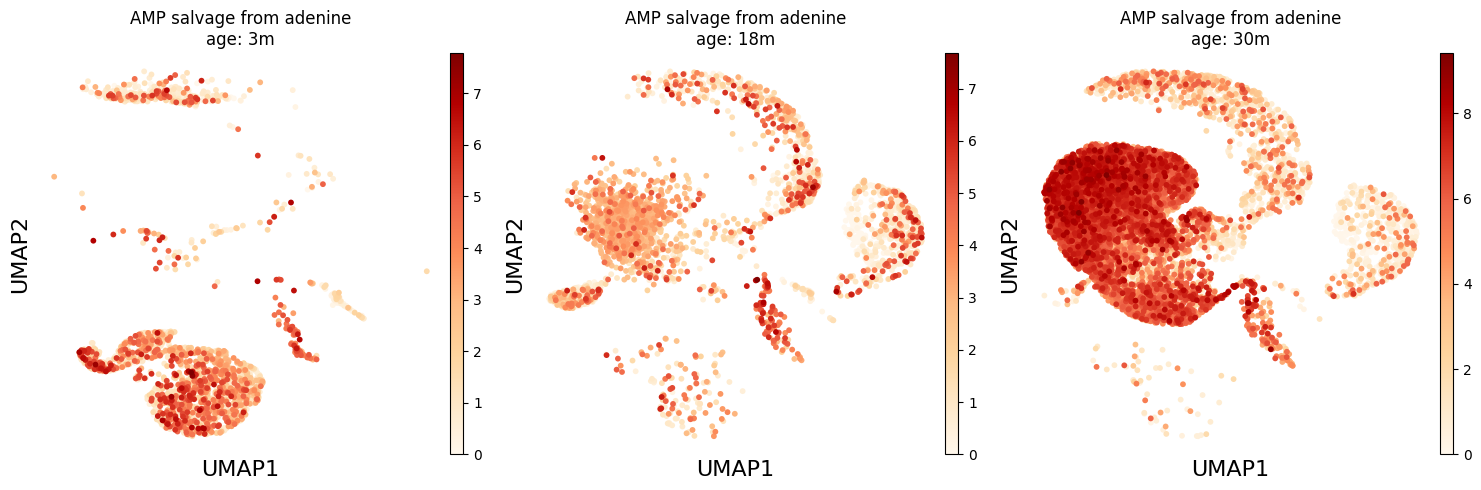

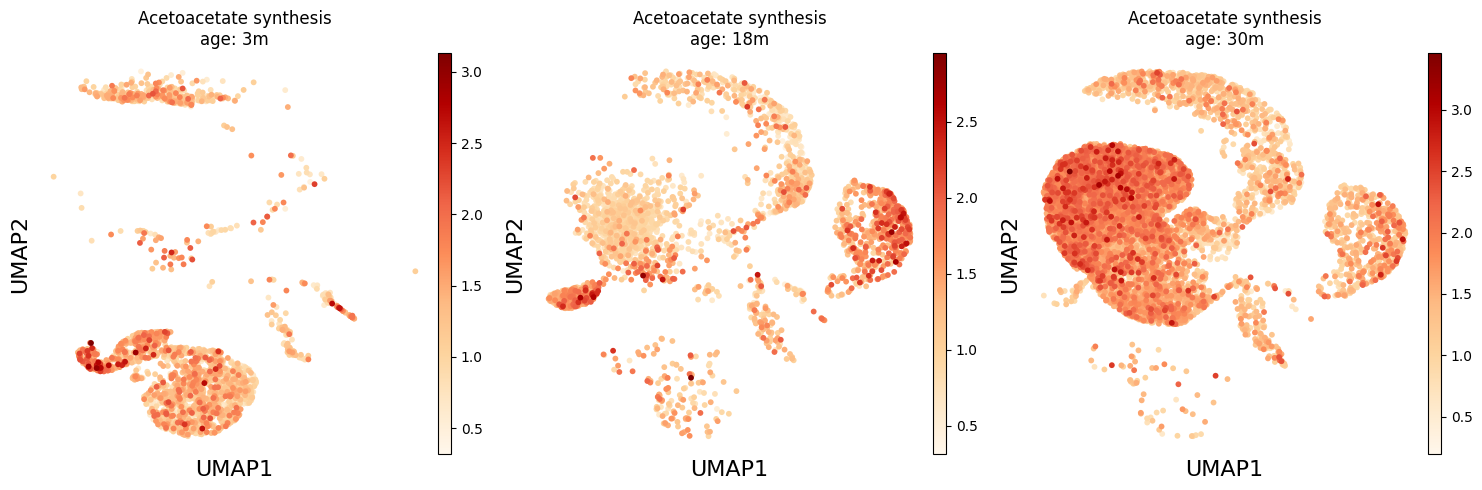

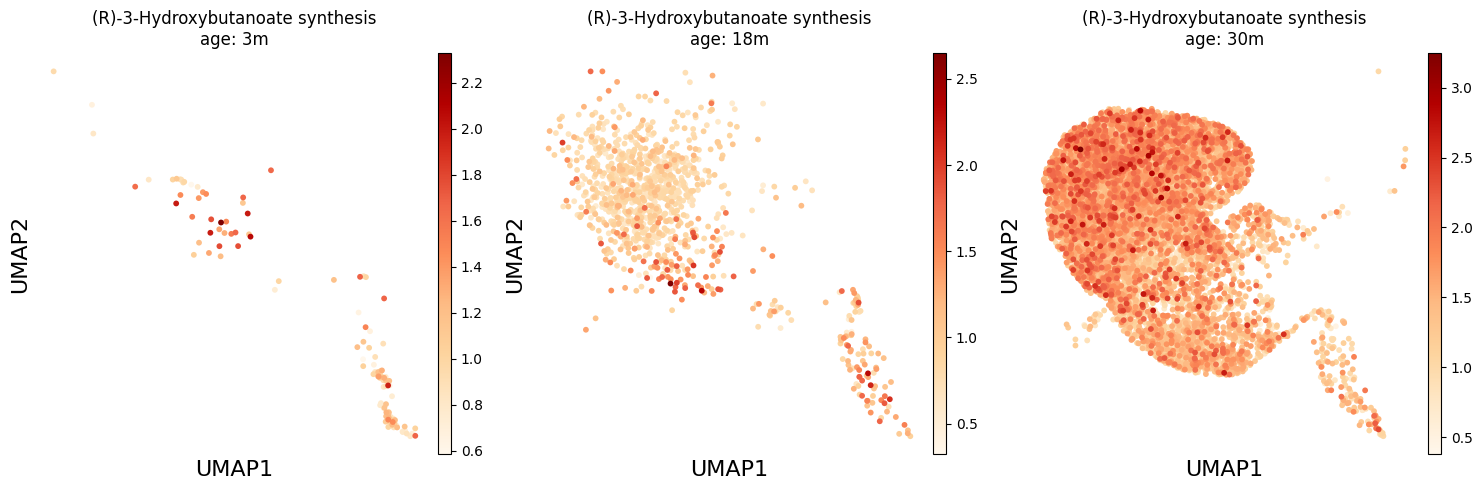

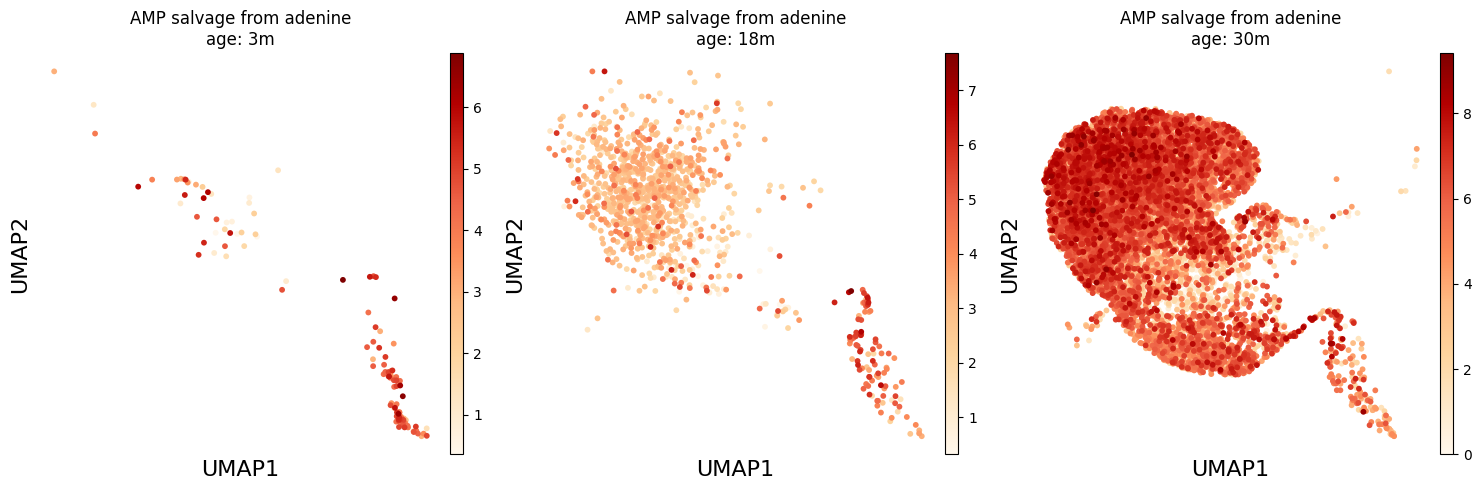

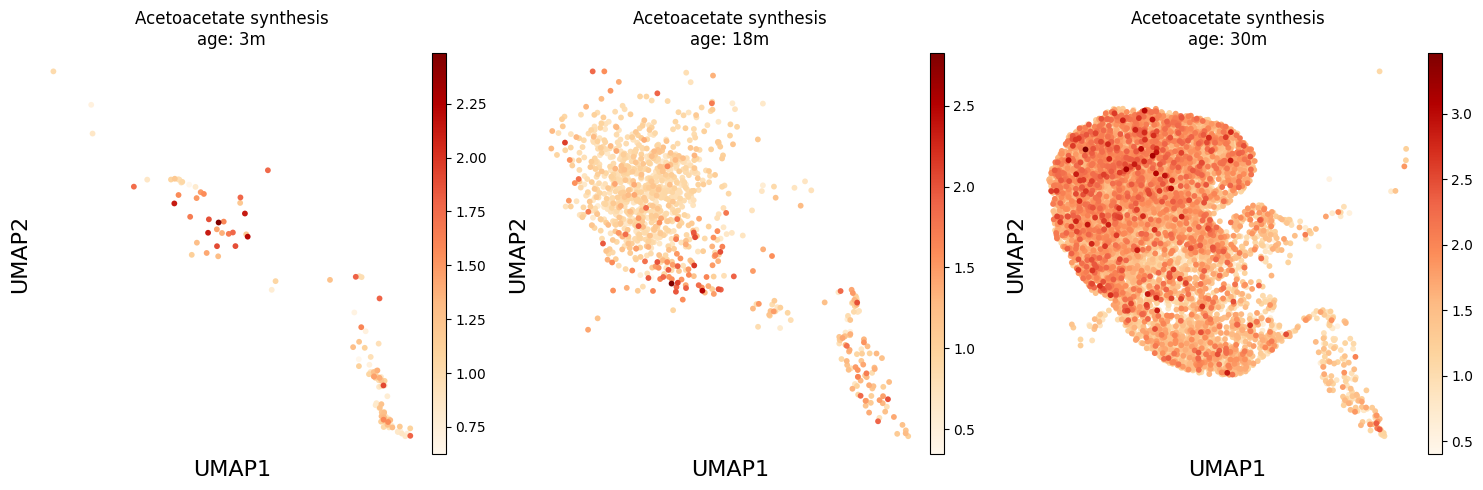

In [66]:
import matplotlib.pyplot as plt
import scanpy as sc


mt = results['adata'].metabolic_tasks
mt_sub = mt[mt.obs['cell_ontology_class'].isin(["alveolar macrophage", "lung macrophage",
                                               "classical monocyte", "non-classical monocyte",
                                               "intermediate monocyte"])].copy()

def split_umap(adata, split_by, colors, ncol=3, **kwargs):
    # enforce age order if split_by == "age"
    if split_by == "age":
        cats = [c for c in ["3m", "18m", "30m"] if c in adata.obs[split_by].astype(str).unique()]
    else:
        cats = adata.obs[split_by].astype(str).unique().tolist()

    for color in colors:
        fig, axs = plt.subplots(1, len(cats), figsize=(5*len(cats), 5))
        if len(cats) == 1:
            axs = [axs]
        for ax, cat in zip(axs, cats):
            sc.pl.umap(
                adata[adata.obs[split_by].astype(str) == cat],
                color=color,
                ax=ax,
                show=False,
                size=70,        # 👈 fixed dot size
                title=f"{color}\n{split_by}: {cat}",
                **kwargs
            )
            # remove borders
            for spine in ax.spines.values():
                spine.set_visible(False)
            # bigger axis labels
            ax.set_xlabel("UMAP1", fontsize=16)
            ax.set_ylabel("UMAP2", fontsize=16)
            ax.tick_params(labelsize=12)

        plt.tight_layout()
        plt.show()

mt_sub
# Example: split UMAPs of tasks by age
split_umap(results['adata'].metabolic_tasks, split_by="age", colors=metabolic_tasks, cmap="OrRd")
split_umap(mt_sub, split_by="age", colors=metabolic_tasks, cmap="OrRd")


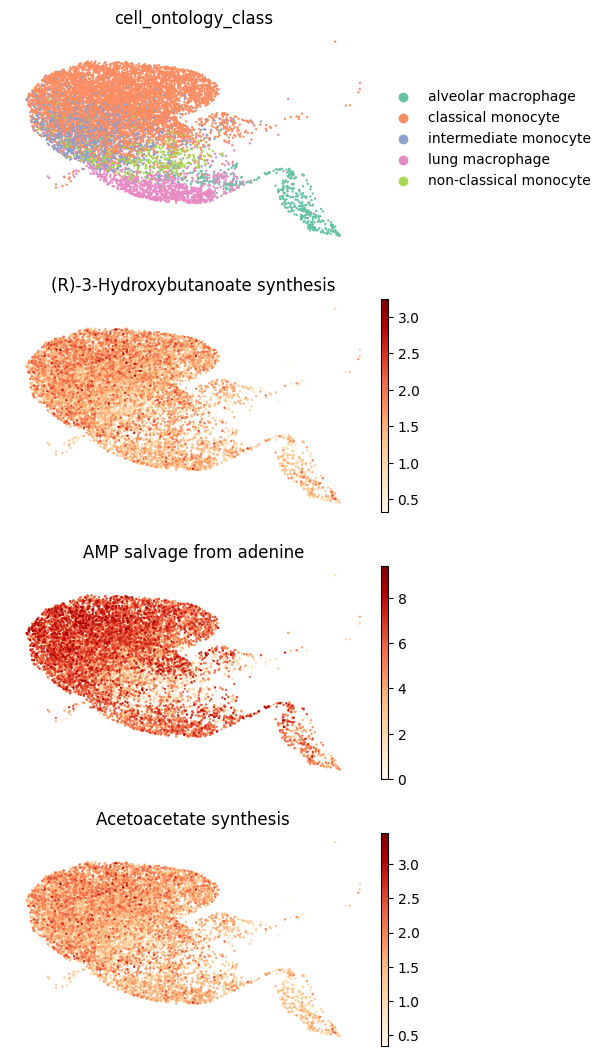

In [65]:
sc.pl.embedding(mt_sub,
                color=[cell_group] + metabolic_tasks,
                ncols=1,
                palette=palette,
                frameon=False,
                basis='X_umap',
                wspace=0.7,
                title=["\n".join(textwrap.wrap(t, width=60)) for t in [cell_group] + metabolic_tasks],
                cmap='OrRd'
               )

In [16]:
adata.obs.columns

Index(['age', 'cell', 'cell_ontology_class', 'cell_ontology_id',
       'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue',
       'tissue', 'tissue_free_annotation', 'n_counts', 'louvain', 'leiden'],
      dtype='object')

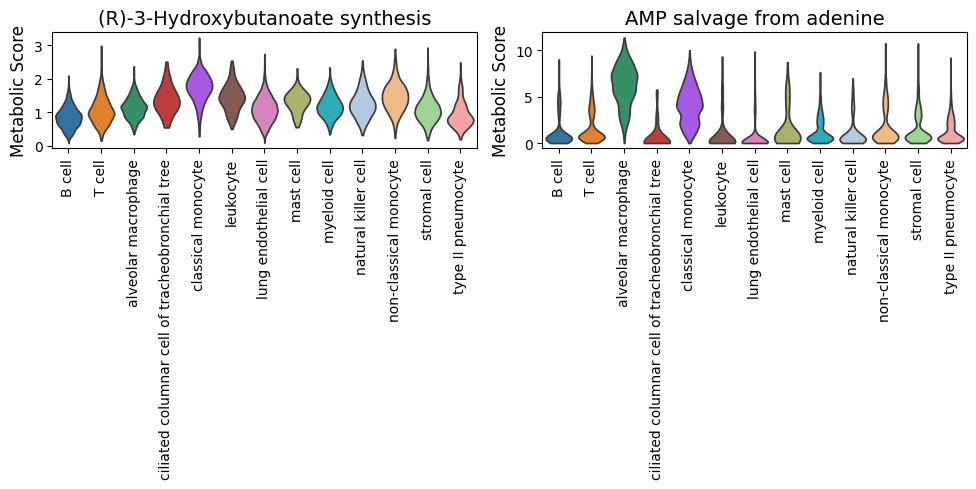

In [116]:
fig, axes = sccellfie.plotting.create_multi_violin_plots(results['adata'].metabolic_tasks,
                                                         features=metabolic_tasks,
                                                         groupby=cell_group,
                                                         stripplot=False,
                                                         n_cols=2,
                                                         ylabel='Metabolic Score'
                                                        )

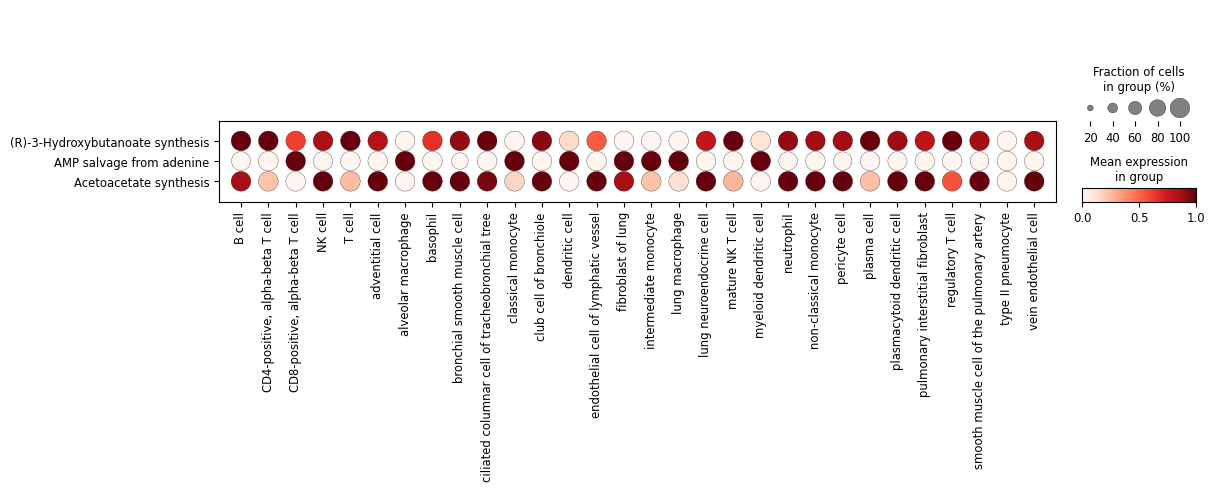

In [74]:
sc.pl.dotplot(results['adata'].metabolic_tasks, var_names=metabolic_tasks, groupby=cell_group, swap_axes=True, standard_scale='var')


In [121]:
list(results['task_info']['Task'].head(10))       # task names, systems, etc.

metabolic_tasks = list(results['task_info']['Task'].head(20))
cell_group = 'cell_type'        # categorical column in adata.obs

# Column indicating the cell types in the adata.obs dataframe
age_group = "age"
mt_alverolar_ma = mt[mt.obs[cell_group].isin(["alveolar macrophage", "lung macrophages"])].copy()
ax = sc.pl.heatmap(mt_alverolar_ma, var_names=metabolic_tasks, groupby=age_group, cmap="YlGnBu", swap_axes=True, dendrogram=True,
                   figsize=(16, 4)
                  )

KeyError: "Could not find keys '[np.str_('Beta-alanine to 3-oxopropanoate')]' in columns of `adata.obs` or in adata.var_names."

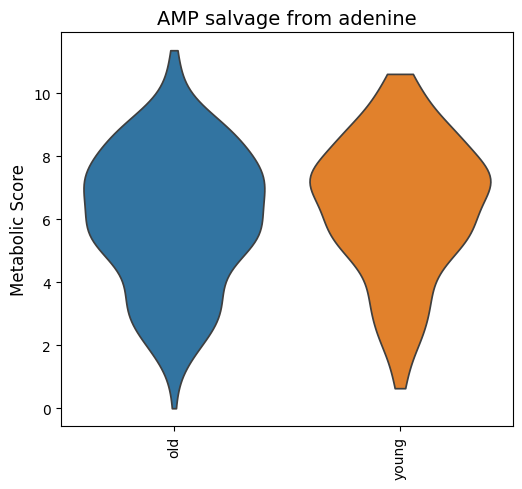

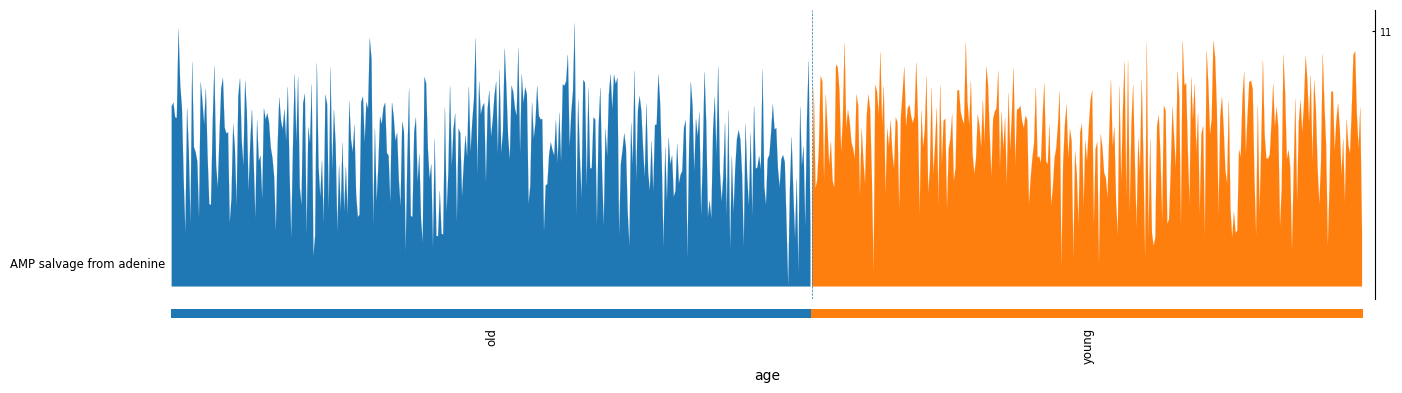

In [122]:
metabolic_tasks = [ 'AMP salvage from adenine',
                   'Acetoacetate synthesis'
                  ]

fig, axes = sccellfie.plotting.create_multi_violin_plots(mt_alverolar_ma,
                                                         features=['AMP salvage from adenine'],
                                                         groupby=age_group,
                                                         stripplot=False,
                                                         n_cols=2,
                                                         ylabel='Metabolic Score'
                                                        )

ax = sc.pl.tracksplot(mt_alverolar_ma, var_names=['AMP salvage from adenine'], groupby=age_group, dendrogram=False, figsize=(16, 4))
